<h3>Import Statements</h3>

In [79]:
import os

os.system(f"pip install -r {os.path.abspath(os.getcwd())}/requirements.txt")

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/Users/valentina/Documents/GitHub/AFFP/src/model/requirements.txt'


256

In [80]:
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

from datasets import dataset

<h3>Loading in training data</h3>

In [81]:
temp_train = np.asarray(dataset['Temperature'])
rh_train = np.asarray(dataset['RH'])
wind_train = np.asarray(dataset['Ws'])
rain_train = np.asarray(dataset['Rain'])

### Obtaining the x_train and y_train data ###

In [82]:
xData = np.column_stack((temp_train, rh_train, wind_train, rain_train))
yData = np.asarray(dataset['Classes'].apply(lambda x: 1 if x == 'fire' else 0))

x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25)

### Defining model layers and creating the model ###

In [83]:
input_shape = x_train.shape[1:]
inputs = Input(shape=input_shape)
x = Dense(32, activation='relu', kernel_regularizer='l1')(inputs)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

### Define the optimizer

In [84]:
optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.001,
	beta_1=0.9,
	beta_2=0.999,
	epsilon=1e-07
)

### Define the early stopping criteria

In [85]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### Compiling, training, and evaluating the model

In [86]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Verbose = 0 for minimal output
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/150
5/5 [==============================] - 1s 51ms/step - loss: 3.8389 - accuracy: 0.4110 - val_loss: 1.8672 - val_accuracy: 0.4054
Epoch 2/150
5/5 [==============================] - 0s 10ms/step - loss: 2.1842 - accuracy: 0.5959 - val_loss: 0.7791 - val_accuracy: 0.8378
Epoch 3/150
5/5 [==============================] - 0s 10ms/step - loss: 0.9884 - accuracy: 0.8014 - val_loss: 0.6167 - val_accuracy: 0.9189
Epoch 4/150
5/5 [==============================] - 0s 10ms/step - loss: 0.6077 - accuracy: 0.9110 - val_loss: 0.6433 - val_accuracy: 0.9730
Epoch 5/150
5/5 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.9452 - val_loss: 0.6930 - val_accuracy: 0.9730
Epoch 6/150
5/5 [==============================] - 0s 11ms/step - loss: 0.5290 - accuracy: 0.9589 - val_loss: 0.7223 - val_accuracy: 0.9730
Epoch 7/150
5/5 [==============================] - 0s 12ms/step - loss: 0.4906 - accuracy: 0.9726 - val_loss: 0.7371 - val_accuracy: 0.9730
Epoch 8/150
5/5 [===

### Visualizing results

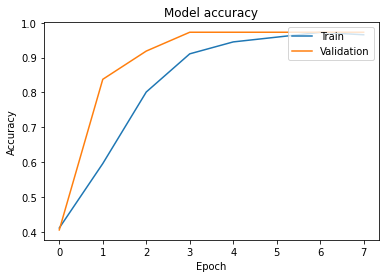

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

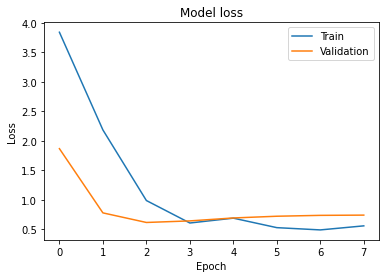

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()